In [142]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import glob
from skimage.feature import hog
import time
from sklearn.linear_model import LinearRegression
#sklearn


In [2]:
"""
데이터 적재 
"""

'\n데이터 적재 \n'

In [3]:
car_images = []
noncar_images = []
print('0')
for root, dirs, files in os.walk('./data/vehicles/'):
    print("1")
    print("root"+ root)
    print( dirs)
    print("="*30)
    print( files)
    print("-"*30)
    for file in files:
        print("2")
        if file.endswith(".png"):
            print('3')
            car_images.append(os.path.join(root, file))
            print('4')
            
print('no0')
for root, dirs, files in os.walk('./data/non-vehicles/'):
    print("no1")
    print("no_root"+ root)
    print( dirs)
    print("#"*30)
    print( files)
    print("*"*30)
    for file in files:
        print("no2")
        if file.endswith(".png"):
            print('no3')
            noncar_images.append(os.path.join(root, file))
            print('no4')

0
1
root./data/vehicles/
['GTI_Far', 'GTI_Left', 'GTI_MiddleClose', 'GTI_Right', 'KITTI_extracted']
[]
------------------------------
1
root./data/vehicles/GTI_Far
[]
['image0000.png', 'image0001.png', 'image0002.png', 'image0003.png', 'image0004.png', 'image0005.png', 'image0006.png', 'image0007.png', 'image0008.png', 'image0009.png', 'image0010.png', 'image0014.png', 'image0015.png', 'image0016.png', 'image0018.png', 'image0019.png', 'image0021.png', 'image0022.png', 'image0023.png', 'image0024.png', 'image0027.png', 'image0029.png', 'image0030.png', 'image0033.png', 'image0036.png', 'image0037.png', 'image0039.png', 'image0040.png', 'image0041.png', 'image0042.png', 'image0043.png', 'image0044.png', 'image0045.png', 'image0046.png', 'image0047.png', 'image0048.png', 'image0049.png', 'image0050.png', 'image0051.png', 'image0052.png', 'image0053.png', 'image0054.png', 'image0064.png', 'image0065.png', 'image0066.png', 'image0067.png', 'image0068.png', 'image0069.png', 'image0070.png',

3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4


4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2


4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2


2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3


4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2
3
4
2


no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4


no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4


no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3


no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2


no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4


no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4


no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2
no3
no4
no2


In [4]:
car_images

['./data/vehicles/GTI_Far\\image0000.png',
 './data/vehicles/GTI_Far\\image0001.png',
 './data/vehicles/GTI_Far\\image0002.png',
 './data/vehicles/GTI_Far\\image0003.png',
 './data/vehicles/GTI_Far\\image0004.png',
 './data/vehicles/GTI_Far\\image0005.png',
 './data/vehicles/GTI_Far\\image0006.png',
 './data/vehicles/GTI_Far\\image0007.png',
 './data/vehicles/GTI_Far\\image0008.png',
 './data/vehicles/GTI_Far\\image0009.png',
 './data/vehicles/GTI_Far\\image0010.png',
 './data/vehicles/GTI_Far\\image0014.png',
 './data/vehicles/GTI_Far\\image0015.png',
 './data/vehicles/GTI_Far\\image0016.png',
 './data/vehicles/GTI_Far\\image0018.png',
 './data/vehicles/GTI_Far\\image0019.png',
 './data/vehicles/GTI_Far\\image0021.png',
 './data/vehicles/GTI_Far\\image0022.png',
 './data/vehicles/GTI_Far\\image0023.png',
 './data/vehicles/GTI_Far\\image0024.png',
 './data/vehicles/GTI_Far\\image0027.png',
 './data/vehicles/GTI_Far\\image0029.png',
 './data/vehicles/GTI_Far\\image0030.png',
 './data/ve

In [5]:
noncar_images

['./data/non-vehicles/Extras\\extra1.png',
 './data/non-vehicles/Extras\\extra10.png',
 './data/non-vehicles/Extras\\extra100.png',
 './data/non-vehicles/Extras\\extra1000.png',
 './data/non-vehicles/Extras\\extra1001.png',
 './data/non-vehicles/Extras\\extra1002.png',
 './data/non-vehicles/Extras\\extra1003.png',
 './data/non-vehicles/Extras\\extra1004.png',
 './data/non-vehicles/Extras\\extra1005.png',
 './data/non-vehicles/Extras\\extra1006.png',
 './data/non-vehicles/Extras\\extra1007.png',
 './data/non-vehicles/Extras\\extra1008.png',
 './data/non-vehicles/Extras\\extra1009.png',
 './data/non-vehicles/Extras\\extra101.png',
 './data/non-vehicles/Extras\\extra1010.png',
 './data/non-vehicles/Extras\\extra1011.png',
 './data/non-vehicles/Extras\\extra1012.png',
 './data/non-vehicles/Extras\\extra1013.png',
 './data/non-vehicles/Extras\\extra1014.png',
 './data/non-vehicles/Extras\\extra1015.png',
 './data/non-vehicles/Extras\\extra102.png',
 './data/non-vehicles/Extras\\extra103.png

In [6]:
"""
이미지 특성 추출 과 레이블링
"""

'\n이미지 특성 추출 과 레이블링\n'

In [7]:
#테스트 할때는 그냥 넘어가자
#자동차 전체 정답 특성 추출
start = time.time()
for car_image in car_images:
    img = mpimg.imread(car_image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    hog_car_feature, hog_car_image = hog(gray, orientations=9, pixels_per_cell=(4,4), 
                                 cells_per_block=(2, 2), block_norm='L2-Hys', 
                                 transform_sqrt=False, visualize = True, 
                                 feature_vector=False)
end = time.time()
print(f'{end - start:.4f}sec')

257.9940sec


In [8]:
# 정답 레이블 생성
hog_car_feature_answer = []
x =1 
hog_car_feature_answer = np.repeat(x, len(car_images))
print(hog_car_feature_answer)
len(hog_car_feature_answer)

[1 1 1 ... 1 1 1]


8792

In [9]:
# 자동차 아님 전체 특성 추출
start = time.time()
for noncar_image in noncar_images:
    img = cv2.imread(noncar_image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    hog_noncar_feature, hog_noncar_image = hog(gray, orientations=9, pixels_per_cell=(4, 4), 
                                cells_per_block=(2, 2), block_norm='L2-Hys',
                                transform_sqrt=False, visualize=True,
                                feature_vector=False)
end = time.time()
print(f'{end - start:.4f}sec')

273.3405sec


In [10]:
# 자동차 오답 레이블 생성
hog_noncar_feature_answer = []
y =0 
hog_noncar_feature_answer = np.repeat(y, len(noncar_images))
print(hog_noncar_feature_answer)
len(hog_noncar_feature_answer)

[0 0 0 ... 0 0 0]


8968

In [11]:
type(hog_car_feature)

numpy.ndarray

In [12]:
hog_car_feature.ndim

5

In [13]:
hog_car_feature.shape

(15, 15, 2, 2, 9)

In [14]:
"""
이미지 시각화
HOG
"""

'\n이미지 시각화\nHOG\n'

In [15]:
car_images_test = car_images[:10]
#테스트 용 10개만 선택

In [16]:
"""
car이미지
"""

'\ncar이미지\n'

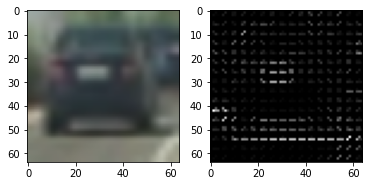

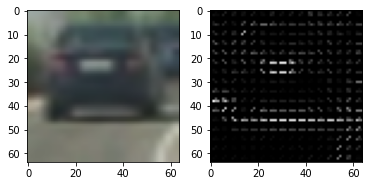

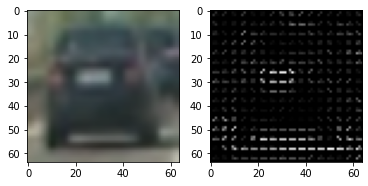

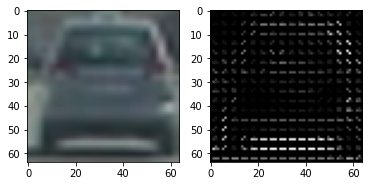

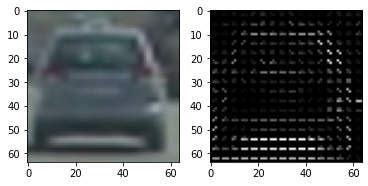

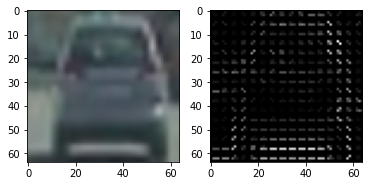

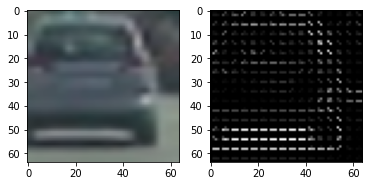

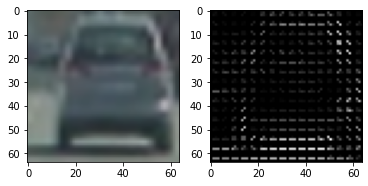

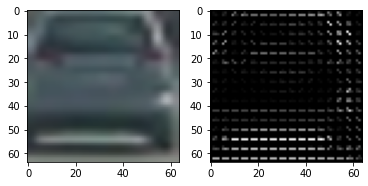

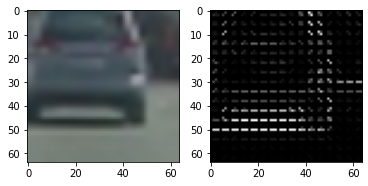

In [17]:
for car_image_show in car_images_test:
    img_show = mpimg.imread(car_image_show)
    gray_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2GRAY)

    hog_car_feature_show, hog_car_image_show = hog(gray_show, orientations=9, pixels_per_cell=(4,4), 
                                 cells_per_block=(2, 2), block_norm='L2-Hys', 
                                 transform_sqrt=False, visualize = True, 
                                 feature_vector=False)
    """#pixels_per_cell 픽셀 사이즈로 셀 생성
    cells_per_block - 셀 크기로 블록 생성
    orientations 방향
    """


    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(img_show)

    plt.subplot(122)
    plt.imshow(hog_car_image_show, cmap='gray')

In [18]:
"""
notcar 이미지 
"""

'\nnotcar 이미지 \n'

In [19]:
noncar_images_test = noncar_images[:10]
#테스트 용 10개만 선택

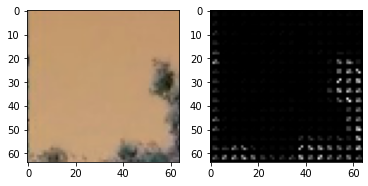

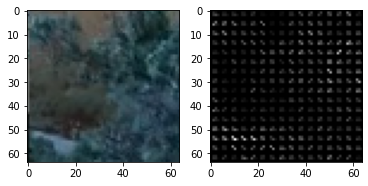

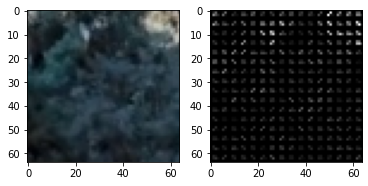

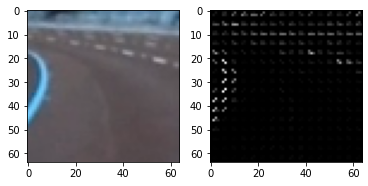

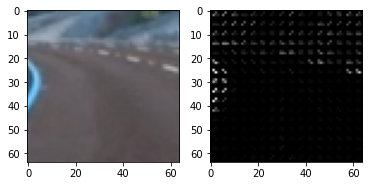

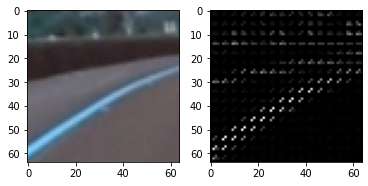

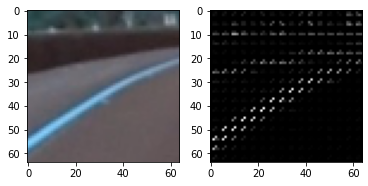

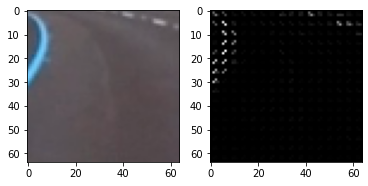

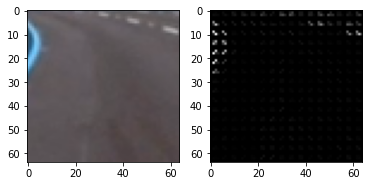

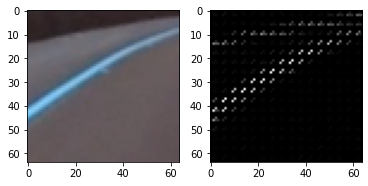

In [20]:
for noncar_image_show in noncar_images_test:
    img_show = cv2.imread(noncar_image_show)
    gray_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2GRAY)

    hog_noncar_feature_show, hog_noncar_image_show = hog(gray_show, orientations=9, pixels_per_cell=(4, 4), 
                                cells_per_block=(2, 2), block_norm='L2-Hys',
                                transform_sqrt=False, visualize=True,
                                feature_vector=False)
    """#pixels_per_cell 픽셀 사이즈로 셀 생성
    cells_per_block - 셀 크기로 블록 생성
    orientations 방향
    """

    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(img_show)

    plt.subplot(122)
    plt.imshow(hog_noncar_image_show, cmap='gray')

In [21]:
"""
feature를 flatten 해야함 
hog_car_feature_show
hog_car_image_show

hog_noncar_feature_show
hog_noncar_image_show

car_images_test
noncar_images_test

=================
hog_car_feature_answer

hog_noncar_feature_answer
len 확인 
그리고 
"""

'\nfeature를 flatten 해야함 \nhog_car_feature_show\nhog_car_image_show\n\nhog_noncar_feature_show\nhog_noncar_image_show\n\ncar_images_test\nnoncar_images_test\n\n=================\nhog_car_feature_answer\n\nhog_noncar_feature_answer\nlen 확인 \n'

In [51]:
"""
hog 알고리즘을 한 전체 자동차 특성 정답 레이블 , 리스트에 다 1이 있음
"""
len(hog_car_feature_answer)


8792

In [52]:
hog_car_feature_answer.shape

(8792,)

In [53]:
"""
hog 알고리즘을 한 전체 자동차 특성, 특성임 - 필요함 필수
"""
len(hog_car_feature)

15

In [54]:
hog_car_feature.shape

(15, 15, 2, 2, 9)

In [55]:
hog_car_feature

array([[[[[0.28971072, 0.18451621, 0.        , ..., 0.07906789,
           0.        , 0.        ],
          [0.28971072, 0.02568143, 0.        , ..., 0.28971072,
           0.01792946, 0.1207291 ]],

         [[0.        , 0.26525973, 0.12045367, ..., 0.03731867,
           0.16188808, 0.04087638],
          [0.28971072, 0.23665193, 0.1893062 , ..., 0.        ,
           0.10520371, 0.14810496]]],


        [[[0.27344416, 0.02283029, 0.        , ..., 0.27344416,
           0.01593894, 0.10732582],
          [0.27344416, 0.1224833 , 0.11617388, ..., 0.065181  ,
           0.03496849, 0.        ]],

         [[0.27344416, 0.21037897, 0.16828954, ..., 0.        ,
           0.09352406, 0.13166243],
          [0.        , 0.27344416, 0.00704294, ..., 0.27344416,
           0.16252647, 0.21222292]]],


        [[[0.26663541, 0.12046482, 0.11425937, ..., 0.06410684,
           0.03439222, 0.        ],
          [0.1534695 , 0.17966686, 0.21570286, ..., 0.1505547 ,
           0.10930658, 0

In [92]:
hog_car_feature_f = hog_car_feature.flatten()
hog_car_feature_f.shape

(8100,)

In [93]:
len(hog_car_feature_f)

8100

In [56]:
"""
10개만 자동차 특성을 뽑은 특성 - 필요함 테스트용
"""
len(hog_car_feature_show)

15

In [98]:
hog_car_feature_show.shape

(15, 15, 2, 2, 9)

In [99]:
hog_car_feature_show

array([[[[[0.02909558, 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.33176373, 0.30208155, 0.18786475, ..., 0.        ,
           0.        , 0.        ]],

         [[0.        , 0.11763771, 0.14392276, ..., 0.        ,
           0.14765457, 0.20738339],
          [0.33176373, 0.33176373, 0.32305813, ..., 0.        ,
           0.05186748, 0.05660304]]],


        [[[0.38378044, 0.25744565, 0.16010564, ..., 0.        ,
           0.        , 0.        ],
          [0.38378044, 0.00611751, 0.01140257, ..., 0.        ,
           0.        , 0.        ]],

         [[0.29720802, 0.38378044, 0.2753227 , ..., 0.        ,
           0.04420348, 0.04823931],
          [0.09294762, 0.34554374, 0.28300156, ..., 0.11650573,
           0.        , 0.05864448]]],


        [[[0.45955215, 0.00951414, 0.01773363, ..., 0.        ,
           0.        , 0.        ],
          [0.05127642, 0.        , 0.0446903 , ..., 0.0187885 ,
           0.        , 0

In [102]:
hog_car_feature_show_f = hog_car_feature_show.flatten()
hog_car_feature_show_f.shape

(8100,)

In [59]:
"""
전체 자동차 hog로 이미지화 한것
"""
len(hog_car_image)

64

In [60]:
hog_car_image.shape

(64, 64)

In [61]:
hog_car_image

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01506562, 0.02652533, ..., 0.00904747, 0.00902303,
        0.        ],
       [0.        , 0.03328227, 0.02182256, ..., 0.01007671, 0.01010115,
        0.00105368],
       ...,
       [0.        , 0.07787804, 0.02257732, ..., 0.02771727, 0.0237292 ,
        0.        ],
       [0.        , 0.0540215 , 0.10932222, ..., 0.09252432, 0.09651239,
        0.06879512],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [62]:
"""
10개의 자동차 hog로 이미지한것
"""
len(hog_car_image_show)

64

In [63]:
hog_car_image_show.shape

(64, 64)

In [64]:
hog_car_image_show

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01338267, ..., 0.01949036, 0.00095245,
        0.        ],
       [0.        , 0.03089912, 0.01751645, ..., 0.0034103 , 0.0219482 ,
        0.00245784],
       ...,
       [0.        , 0.        , 0.00161771, ..., 0.00149018, 0.        ,
        0.        ],
       [0.        , 0.00259969, 0.00098198, ..., 0.00166813, 0.00315831,
        0.00166813],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [65]:

"""
hog 알고리즘을 한 틀린 전체 자동차 특성, 특성임 - 필요함 필수 - 다 틀린값
"""
len(hog_noncar_feature)

15

In [104]:
hog_noncar_feature.shape

(15, 15, 2, 2, 9)

In [103]:
hog_noncar_feature_f = hog_noncar_feature.flatten()
hog_noncar_feature_f.shape

(8100,)

In [66]:
"""
hog 알고리즘을 한 틀린 전체 자동차 특성 정답 레이블 , 리스트에 다 0이 있음
"""
len(hog_noncar_feature_answer)

8968

In [67]:
"""
10개만 틀린 자동차 특성을 뽑은 특성 - 필요함 테스트용
"""
len(hog_noncar_feature_show)


15

In [105]:
hog_noncar_feature_show.shape

(15, 15, 2, 2, 9)

In [108]:
hog_noncar_feature_show_f = hog_noncar_feature_show.flatten()
hog_noncar_feature_show_f.shape

(8100,)

In [68]:
"""
모든 틀린 자동차 hog로 이미지한것
"""
len(hog_noncar_image)


64

In [69]:
"""
10개의 틀린 자동차 hog로 이미지한것
"""
len(hog_noncar_image_show)


64

In [ ]:
"""
히스토그램 분석
-자동차와 
-자동차 아닌것 으로 해야함
"""

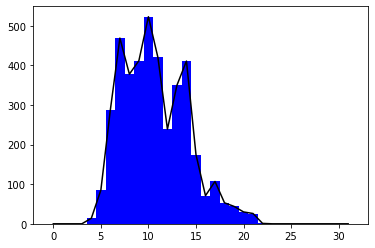

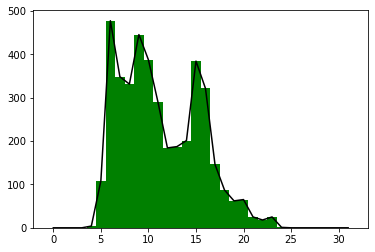

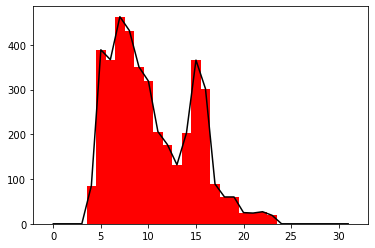

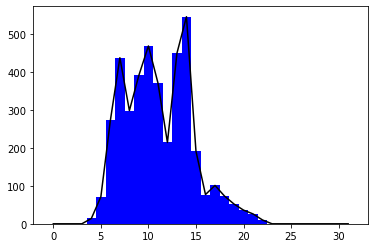

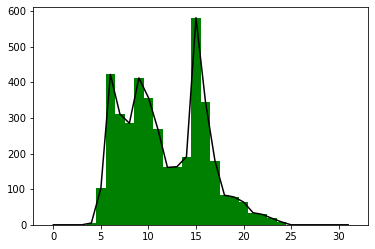

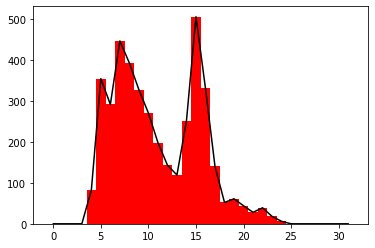

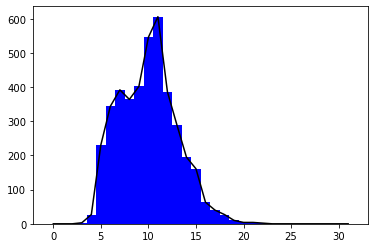

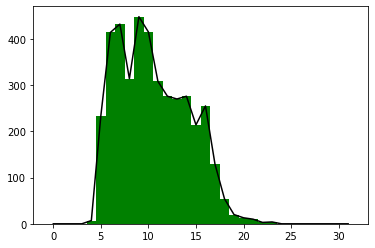

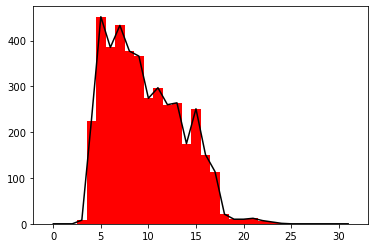

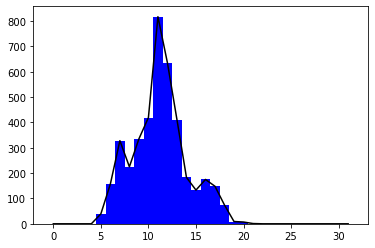

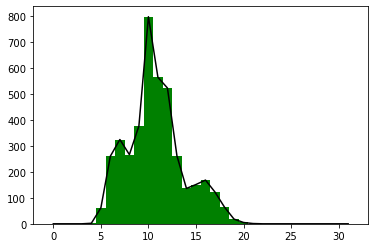

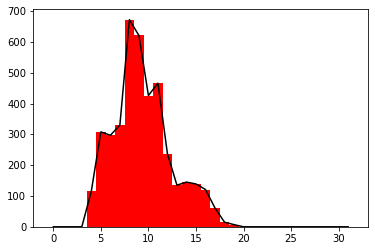

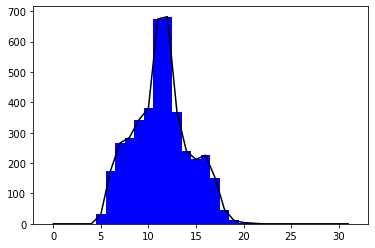

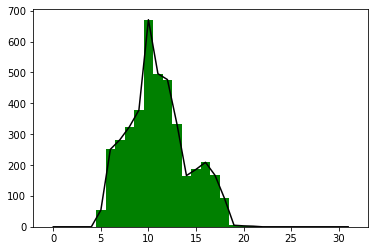

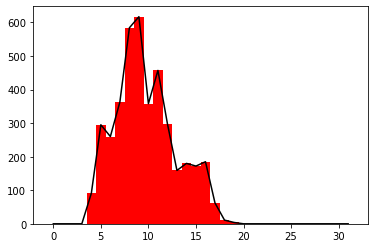

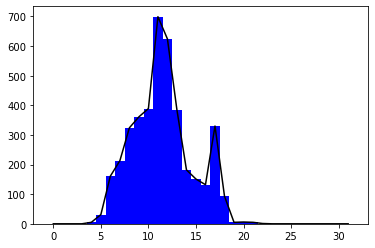

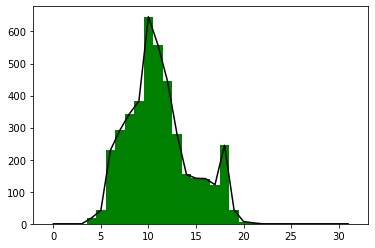

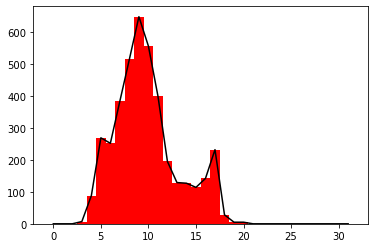

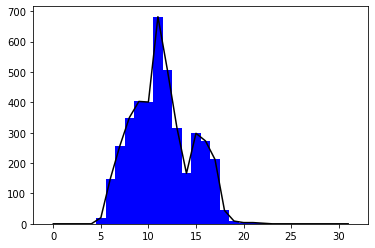

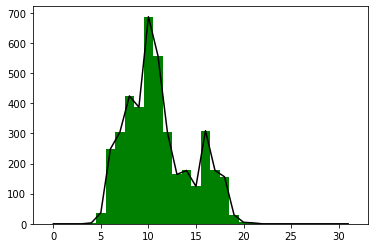

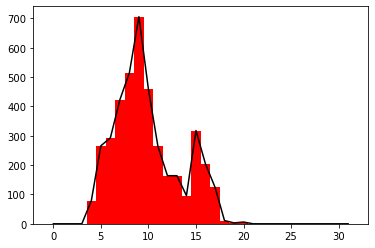

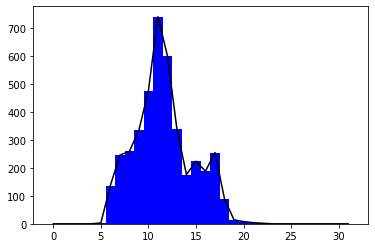

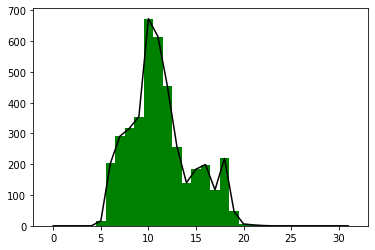

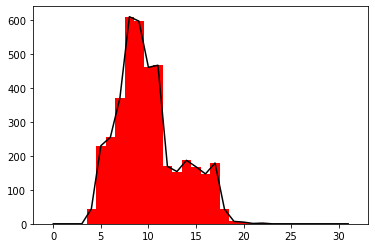

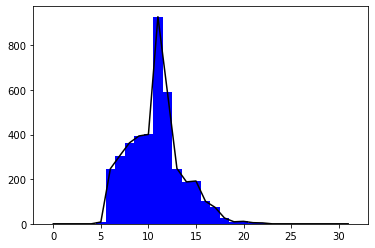

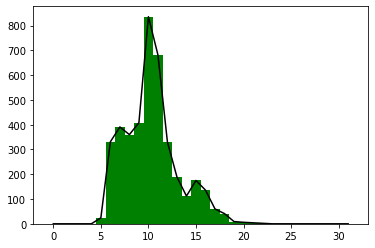

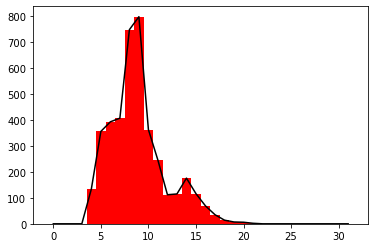

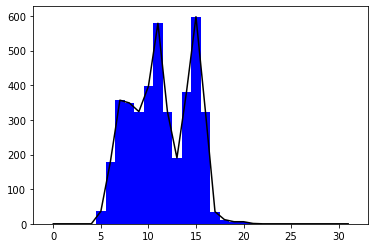

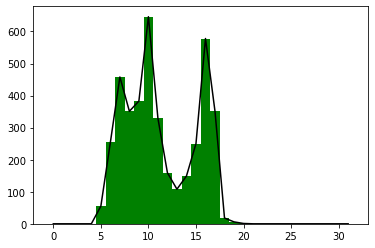

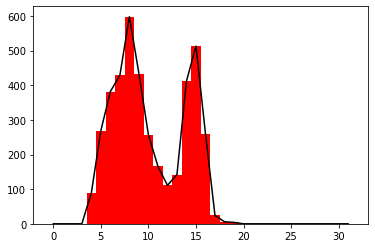

In [111]:
for car_images_test_plt in car_images_test:
    #테스트용 앞에서 슬라이싱한 10개만 이용하기
    src = cv2.imread(car_images_test_plt)

    hist1_b = cv2.calcHist(images = [src], 
                         channels = [0], 
                         mask = None, 
                         histSize = [32], 
                         ranges = [0, 255])

    hist2_g = cv2.calcHist(images = [src], 
                         channels = [1], 
                         mask = None, 
                         histSize = [32], 
                         ranges = [0, 255])

    hist3_r = cv2.calcHist(images = [src], 
                         channels = [2], 
                         mask = None, 
                         histSize = [32], 
                         ranges = [0, 255])

    """
    히스토그램 분석
    """
    hist1_b = hist1_b.flatten()
    plt.plot(hist1_b, color='black')
    binX = np.arange(32)
    plt1 = plt.bar(binX, hist1_b, width=1, color='b')
    plt.show(plt1)

    hist2_g = hist2_g.flatten()
    plt.plot(hist2_g, color='black')
    binX = np.arange(32)
    plt2 = plt.bar(binX, hist2_g, width=1, color='g')
    plt.show(plt2)

    hist3_r = hist3_r.flatten()
    plt.plot(hist3_r, color='black')
    binX = np.arange(32)
    plt3 = plt.bar(binX, hist3_r, width=1, color='r')
    plt.show(plt3)
    
    print("="*80) 

    hist1_b_f = hist1_b.flatten()
    hist2_g_f = hist2_g.flatten()
    hist3_r_f = hist3_r.flatten()

    hist_show_f = np.concatenate([hist1_b_f, hist2_g_f, hist3_r_f]) # 특성 합치는 함수

    hist_show_f


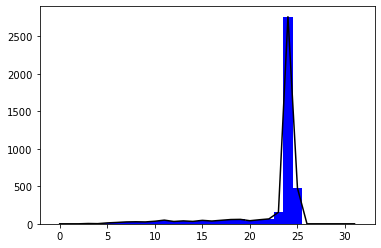

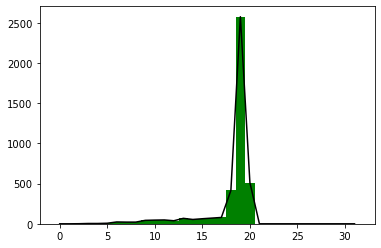

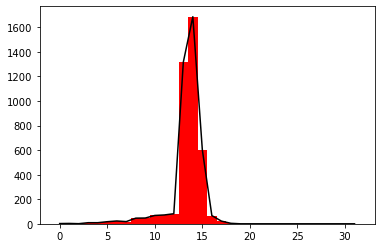

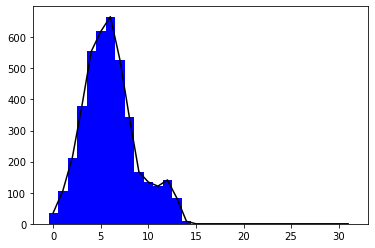

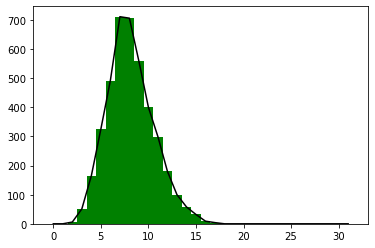

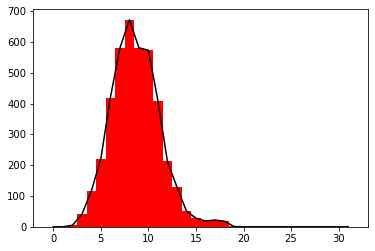

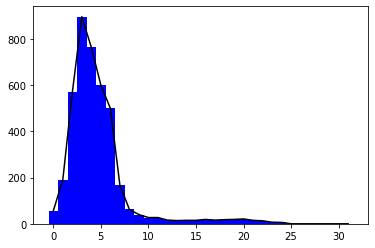

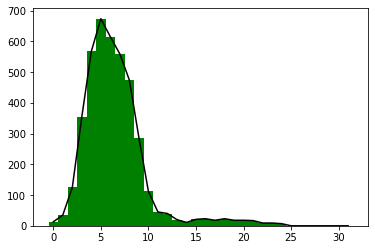

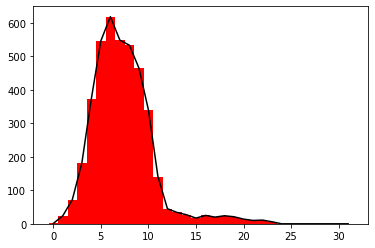

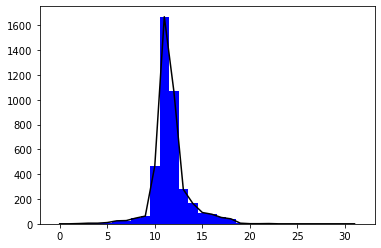

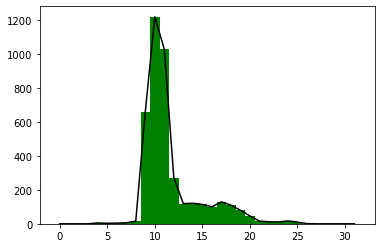

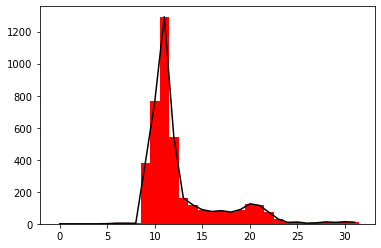

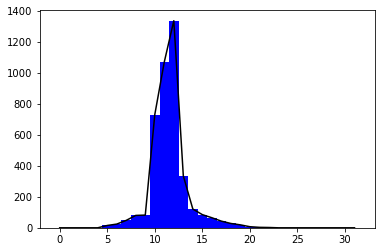

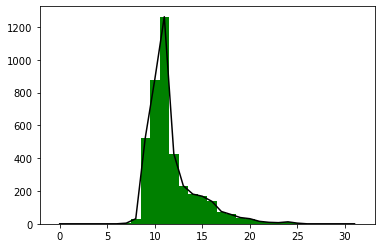

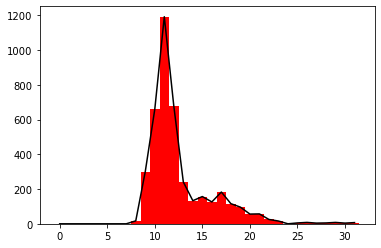

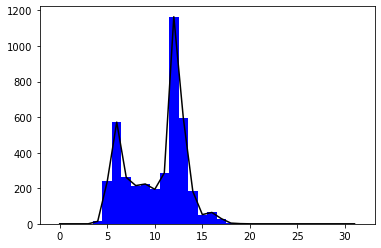

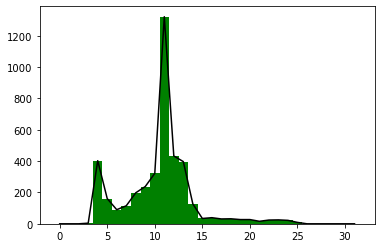

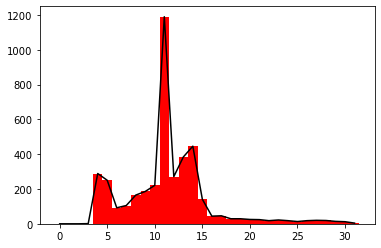

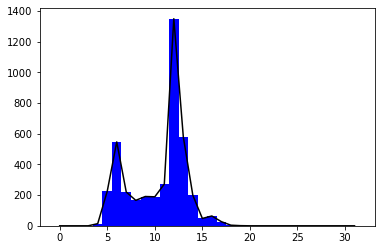

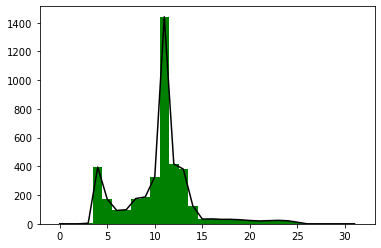

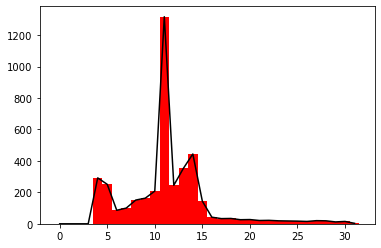

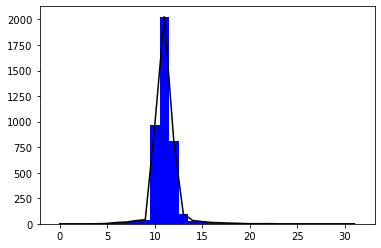

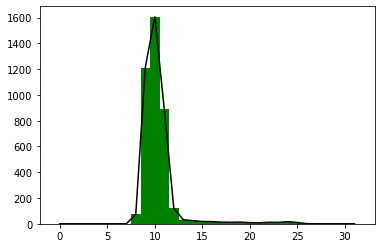

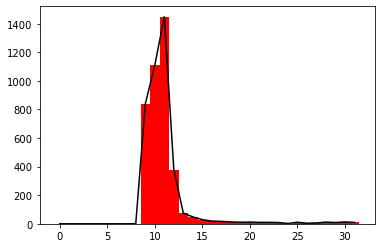

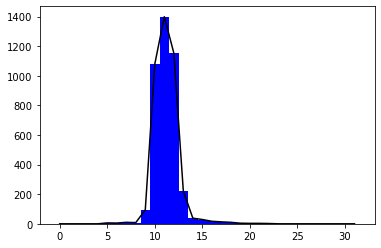

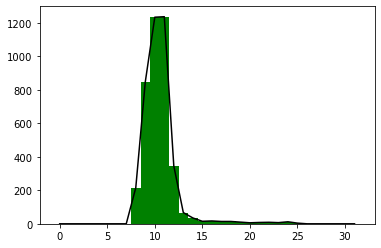

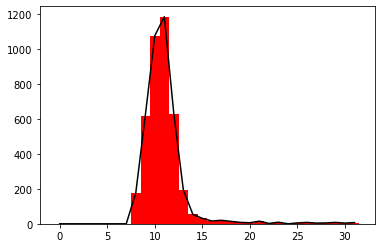

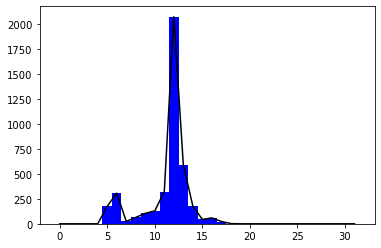

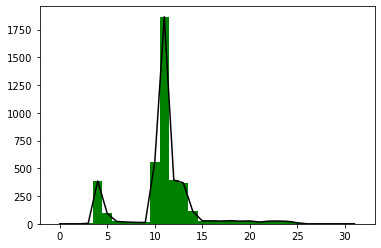

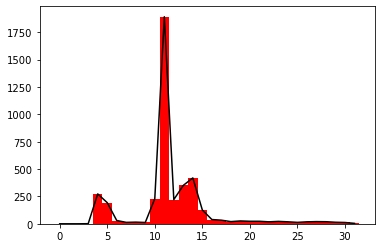

In [124]:
for noncar_images_test_plt in noncar_images_test:
    #테스트용 앞에서 슬라이싱한 10개만 이용하기
    src = cv2.imread(noncar_images_test_plt)

    hist1_b = cv2.calcHist(images = [src], 
                         channels = [0], 
                         mask = None, 
                         histSize = [32], 
                         ranges = [0, 255])

    hist2_g = cv2.calcHist(images = [src], 
                         channels = [1], 
                         mask = None, 
                         histSize = [32], 
                         ranges = [0, 255])

    hist3_r = cv2.calcHist(images = [src], 
                         channels = [2], 
                         mask = None, 
                         histSize = [32], 
                         ranges = [0, 255])

    """
    히스토그램 분석
    """
    hist1_b = hist1_b.flatten()
    plt.plot(hist1_b, color='black')
    binX = np.arange(32)
    plt1 = plt.bar(binX, hist1_b, width=1, color='b')
    plt.show(plt1)

    hist2_g = hist2_g.flatten()
    plt.plot(hist2_g, color='black')
    binX = np.arange(32)
    plt2 = plt.bar(binX, hist2_g, width=1, color='g')
    plt.show(plt2)

    hist3_r = hist3_r.flatten()
    plt.plot(hist3_r, color='black')
    binX = np.arange(32)
    plt3 = plt.bar(binX, hist3_r, width=1, color='r')
    plt.show(plt3)
    
    print("="*80) 

    hist1_b_f = hist1_b.flatten()
    hist2_g_f = hist2_g.flatten()
    hist3_r_f = hist3_r.flatten()

    hist_non_show_f = np.concatenate([hist1_b_f, hist2_g_f, hist3_r_f]) # 특성 합치는 함수

    hist_non_show_f


In [112]:
len(hist_show_f)

96

In [113]:
hist_show_f.shape

(96,)

In [114]:
hist_show_f

array([  0.,   0.,   0.,   0.,   0.,  36., 179., 357., 349., 324., 397.,
       579., 324., 190., 380., 598., 323.,  35.,  12.,   6.,   6.,   1.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  55., 254., 458., 351., 383., 646., 329.,
       159., 108., 149., 250., 578., 351.,  18.,   6.,   1.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  89., 269., 382., 429., 598., 434., 257., 166., 111.,
       142., 412., 513., 260.,  24.,   6.,   4.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.], dtype=float32)

In [120]:
"""
-자동차와
- 자동차 아닌것으로 해야함
"""
for car_images_test_size in car_images_test:

    src_size = cv2.imread(car_images_test_size)

    src_size.shape

    src_resize = cv2.resize(src, (32,32)) # fx: 가로 사이즈의 배수

    src_resize.shape

    src_resize_show_f = src_resize.flatten()
    src_resize_show_f

In [126]:
for noncar_images_test_size in noncar_images_test:

    src_size = cv2.imread(noncar_images_test_size)

    src_size.shape

    src_non_resize = cv2.resize(src, (32,32)) # fx: 가로 사이즈의 배수

    src_non_resize.shape

    src_non_resize_show_f = src_non_resize.flatten()
    src_non_resize_show_f

In [121]:
src_resize_show_f

array([ 87,  88,  83, ..., 126, 135, 127], dtype=uint8)

In [122]:
src_resize_show_f.shape

(3072,)

In [123]:
"""
hog_noncar_feature_show_f - 테스트용 10개 틀린 자동차 특성 

hog_noncar_feature_f - 전체 틀린 자동차 특성

hog_car_feature_f - 전체 자동차 특성

hog_car_feature_show_f - 테스트용 10개 자동차 특성

hist_show_f  - 테스트용 10개 자동차 히스토그램

hist_non_show_f - 테스트용 10개 틀린 자동차 히스토그램

src_resize_show_f - 테스트용 10개 자동차 이미지 리사이즈

src_non_resize_show_f - 테스트용 10개 틀린 자동차 이미지 리사이즈

hog_car_feature_answer - 정답 레이블

hog_noncar_feature_answer - 오답 레이브
"""

'\nhog_noncar_feature_show_f - 테스트용 10개 틀린 자동차 특성 \n\nhog_noncar_feature_f - 전체 틀린 자동차 특성\n\nhog_car_feature_f - 전체 자동차 특성\n\nhog_car_feature_show_f - 테스트용 10개 자동차 특성\n\nhist_show_f  - 테스트용 10개 자동차 히스토그램\n\nsrc_resize_show_f - 테스트용 10개 자동차 이미지 리사이즈\n'

In [127]:
X_car_show = np.concatenate([hog_car_feature_show_f, hist_show_f, src_resize_show_f]) # 특성 합치는 함수
X_noncar_show = np.concatenate([hog_noncar_feature_show_f, hist_non_show_f, src_non_resize_show_f])

In [128]:
X_car_show

array([2.90955761e-02, 0.00000000e+00, 0.00000000e+00, ...,
       1.26000000e+02, 1.35000000e+02, 1.27000000e+02])

In [135]:
X_noncar_show

array([ 0.17901258,  0.        ,  0.        , ..., 94.        ,
       81.        , 83.        ])

In [136]:
X_all_show = np.concatenate([X_car_show, X_noncar_show])

In [137]:
X_all_show.shape

(22536,)

In [138]:
len(X_all_show)

22536

In [139]:
hog_car_feature_answer.shape

(8792,)

In [140]:
len(hog_car_feature_answer)
# len 길이가 왜 다른가

8792

In [141]:
# 정답 레이블 생성 - 테스트용 
hog_car_feature_answer_show = []
x =1 
hog_car_feature_answer_show = np.repeat(x, len(X_all_show))
print(hog_car_feature_answer_show)
len(hog_car_feature_answer_show)

[1 1 1 ... 1 1 1]


22536

In [ ]:
"""
머신러닝 부분 - 
문제는 값이 -1~1 을 넘어선값
"""

In [143]:
lin_reg = LinearRegression()
lin_reg.fit(X_all_show, hog_car_feature_answer_show)

ValueError: Expected 2D array, got 1D array instead:
array=[2.90955761e-02 0.00000000e+00 0.00000000e+00 ... 9.40000000e+01
 8.10000000e+01 8.30000000e+01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.